In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets

# Loading datasets

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()


In [3]:
data = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [4]:
data['class']=breast_cancer.target

In [5]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Applying Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop('class',axis=1)
Y=data['class']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

# Perceptron Class

In [10]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [11]:
class Perceptron:
    def __init__(self):
        self.w = None
        self.b = None

    def model(self,X):
        return ( 1 if (np.dot(self.w,X) >= self.b) else 0 )

    def predict(self,X):
        Y=[]
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self,X,Y,epoch=10000,lr=0.01):
        ## initialise w and b 
        self.w = np.ones(X.shape[1])
        self.b =0
        accuracy ={}
        max_accuracy =0
        for i in range(epoch):
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0 :
                    self.w = self.w + lr*x
                    self.b = self.b + 1
                elif y==0 and y_pred == 1:
                    self.w = self.w - lr*x
                    self.b = self.b - 1
            accuracy[i] = accuracy_score(self.predict(X),Y)
            if accuracy[i]>max_accuracy :
                max_accuracy = accuracy[i]
        print(max_accuracy) ## Training accuracy 
        plt.plot(accuracy.values())
        plt.show()
            

In [12]:
perceptron_obj = Perceptron()

0.9472527472527472


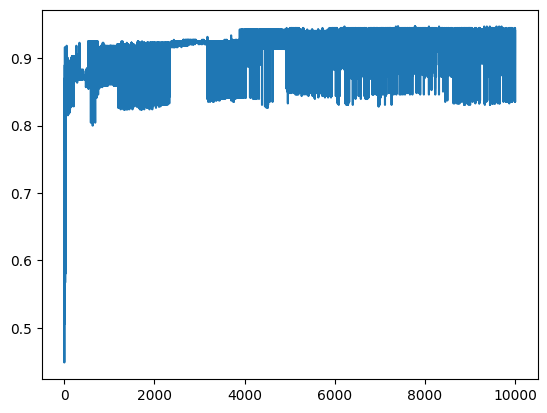

In [13]:
perceptron_obj.fit(X_train.values,y_train.values)

In [14]:
y_pred = perceptron_obj.predict(X_test.values)
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.9122807017543859

# Conclusion 

## Accuray of my Perceptron Model is 0.9122807017543859